BUILD FEEDFORWARD NEURAL NETWORK USING THE TENSORFLOW FRAMEWORK
  1. IMPORTING THE REQUIRED PACKEAGES
  2. TEXT PREPROCESSING WITH THE HELP OF NLP(word tokenization,lemmatization,remove special symbols,remove duplicate word,sorting,word vectorization)
  3. CREATE THE FEEDFORWARD NEURAL NETWORK(MLP) WITH THE HELP OF SEQUENTIAL PREDEFINED CLASS IN THE KERAS LIBRARY(TENSORFLOW)
  4. TRAIN THE NEURAL NETWORK MODEL BEFOR THAT COMPILE THE MODEL WITH SUCH PARAMETERS(loss function, optimizer,accuracy) AND MAKE TRAIN TO PASSING THE PARAMETER SUCH AS( epochs, batch_size, verbose)
  5. AFTER THE TRAIN THE MODEL TEST THE MODEL PERFORMANCE
  6. SAVE THE MODEL ON PYTHON PH5 FILE
  7. BUILD AUTO EVALUATION MODEL


In [ ]:
import tensorflow
import pandas as pd
import numpy as np
import json
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pickle
import random
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation, Dropout
from keras.utils import plot_model
from keras.optimizers.legacy import SGD

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

TEXT PREPROCESSING WITH NLP
  * CREATE EMPTY LIST AND PERFORM WORD TOKENIZATION,LEMMATIZATION,REMOVE SPECIAL SYMBOLS,SORTING, ON  PATTERN AND TAG  KEY ATTRIBUTE IN GIVEN DATASET AND APPEND THE DATA TO LIST
  * AFTER APPEND THE DATA SORTING THE DATA USING SET FUNCTION



In [ ]:
patterns=[]
documents=[]
tags=[]
ignore=['!','?']
data=pd.read_json('/content/data.json')
for datas in data['intents']:
  for pattern in datas['patterns']:
    word_token_pattern=word_tokenize(pattern)
    patterns.extend(word_token_pattern)

    documents.append((word_token_pattern,datas['tag']))

    if datas['tag'] not in tags:
      tags.append(datas['tag'])
print(len(patterns))
lemmatizer=WordNetLemmatizer()
patterns=[lemmatizer.lemmatize(words.lower()) for words in patterns if words not in ignore]
patterns=sorted(list(set(patterns)))
tags=sorted(list(set(tags)))
print(patterns)
print(documents)
print(tags)

299
['a', 'about', 'advantage', 'am', 'an', 'analyis', 'analysis', 'application', 'approach', 'are', 'bag', 'bro', 'bye', 'can', 'chat', 'cosine', 'data', 'day', 'define', 'definition', 'disadvantage', 'dude', 'embeddings', 'entity', 'explain', 'expression', 'friend', 'glove', 'goal', 'good', 'goodbye', 'gram', 'have', 'hello', 'hey', 'hi', 'history', 'how', 'i', 'in', 'information', 'is', 'later', 'leaving', 'lemmatization', 'library', 'long', 'me', 'memory', 'named', 'network', 'neural', 'nlp', 'normalization', 'of', 'or', 'part', 'provide', 'recognition', 'recurrent', 'regular', 'robo', 'see', 'sentiment', 'short', 'similarity', 'skip', 'so', 'speech', 'stemming', 'tagging', 'term', 'text', 'that', 'the', 'there', 'this', 'tokenization', 'type', 'up', 'what', 'whats', 'with', 'word', 'you']
[(['Hi'], 'greeting'), (['Hello'], 'greeting'), (['Good', 'day'], 'greeting'), (['Hey', 'there'], 'greeting'), (['How', 'are', 'you'], 'greetingMore'), (['Whats', 'up'], 'greetingMore'), (['Bye']

SAVE THE DATA WITH PICKLE FILE

In [ ]:
pickle.dump(patterns,open('patterns','wb'))
pickle.dump(tags,open('tags','wb'))

WORD VECTORIZATION
  * CONVERTING THE WORDS INTO REAL NUMBERS SUCH AS BINARY DIGIT BASED ON IN THE DOCUMENTS LIST OF WORDS IT AVAILABLE IN PREPROCESSED PATTERNS LIST, IF AVAILABLE MAKE APPEND IN TRAINING_DATA LIST AS 1 ELSE APPEND 0

In [ ]:
training_data=[]
output_data=[0]*len(tags)
for doc in documents:
  bag_of_word=[]
  patterns_words=doc[0]
  patterns_words=[lemmatizer.lemmatize(patten.lower()) for patten in patterns_words]
  # print(patterns_words)
  for w in patterns:
    if w in patterns_words:
      bag_of_word.append(1)
    else:
      bag_of_word.append(0)
  # print(bag_of_word)
  output_row = list(output_data)
  output_row[tags.index(doc[1])] = 1
  # print(output_row)
  training_data.append([bag_of_word,output_row])
random.shuffle(training_data)
trained_data=np.array(training_data,dtype='object')
x=list(trained_data[:,0])
y=list(trained_data[:,1])
print(len(x))
print(len(y))
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# # X_train, X_val, Y_train, Y_val=train_test_split(X_train, Y_train,test_size=0.2, random_state=0)
# # print(len(X_train),len(X_val))
# # print(len(Y_train),len(Y_test))

87
87


BUILD FEEDFORWARD NEURAL NETWORK
  * USING SEQUENTIAL PREDEFINED CLASS IN KERAS LIBRARY TO BUILD SIMPLE FEEDFORWARD NEURAL NETWORK WITH 128 NEURANS IN INPUT LAYER AND 64 NEURANS IN HIDDEN LAYER AND CALCLUATE LENGTH OF THE VARIABLE(y) NEURANS IN THE OUTPUT LAYER
  * COMPILE THE MODEL WITH LOSS AND OPTIMIZATION FUNCTION THIS FUNCTION AIMS TO UPDATE THE WEIGHTS AND BIAS DURING THE TRAINING PROCESS AND ALSO MINIMIZE THE LOSS, THE LOSS FUNCTION MEASURES THE DIFFERENCE BETWEEN PREDICTED VALUES AND ACTUAL TARGET VALUE
  * TRAIN THE MODEL WITH NO OF EPOCHS(ITERATIVE) BASED ON THE NUMBER OF EPOCHS MODEL CAN PERFORM VERY WELL

In [ ]:
model=tensorflow.keras.models.Sequential()
model.add(Dense(128, input_shape=(len(x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(y[0]), activation='softmax'))
model.summary()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(x,y, epochs=250, batch_size=10, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               11008     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 27)                1755      
                                                                 
Total params: 21019 (82.11 KB)
Trainable params: 21019 (82.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/250
9/9 [==============================] - 1s 3ms/step - loss: 3.2782 - accuracy: 0.0230
Epoch 2/250
9/9 [==============================] - 0s 4ms/step - loss: 3.2479 - accuracy: 0.1724
Epoch 3/250
9/9 [==============================] - 0s 3ms/step - loss: 3.1712 - accuracy: 0.2299
Epoch 4/250
9/9 [==============================] - 0s 3ms/step - loss: 3.1461 - accuracy: 0.2184
Epoch 5/250
9/9 [==============================] - 0s 3ms/step - loss: 3.0802 - accuracy: 0.2414
Epoch 6/250
9/9 [==============================] - 0s 3ms/step - loss: 2.9647 - accuracy: 0.2414
Epoch 7/250
9/9 [==============================] - 0s 3ms/step - loss: 2.9778 - accuracy: 0.2184
Epoch 8/250
9/9 [==============================] - 0s 3ms/step - loss: 2.9389 - accuracy: 0.2184
Epoch 9/250
9/9 [==============================] - 0s 3ms/step - loss: 2.8349 - accuracy: 0.2414
Epoch 10/250
9/9 [==============================] - 0s 3ms/step - loss: 2.7732 - accuracy: 0.2644
Epoch 11/250
9/9 [===========

EVALUATING THE MODEL PERFORMANCE

In [ ]:
scores = model.evaluate(x,y,verbose=1)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

PLOT THE STRUCTURE OF THE FEEDFORWARD NEURAL NETWORK

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


SAVE THE MODEL USING PY5H FILE

In [ ]:
save_model=model.save('model.h5',hist)
# import visualkeras
# visualkeras.layered_view(model,legend=True)

VISUALIZING THE MODEL PERFORMANCE

In [ ]:
import matplotlib.pyplot as plt
training_acc=hist.history['accuracy']
epochs=range(250)
plt.plot(epochs,training_acc,'r',label='training_accuracy')
plt.title('training accuracy vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.legend()
plt.show()

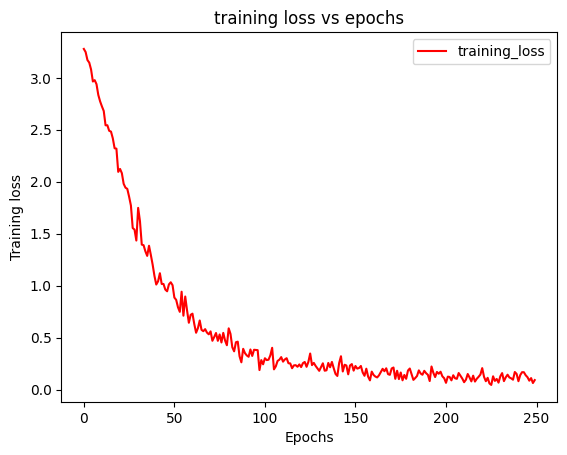

In [ ]:

training_loss=hist.history['loss']
epochs=range(250)
plt.plot(epochs,training_loss,'r',label='training_loss')
plt.title('training loss vs epochs')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

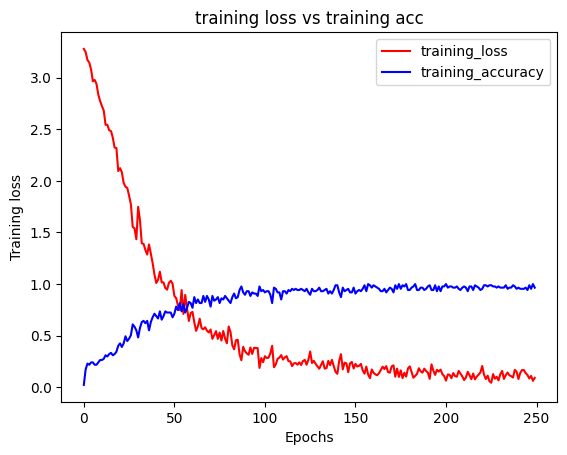

In [ ]:
training_loss=hist.history['loss']
training_accuracy=hist.history['accuracy']
epochs=range(250)
plt.plot(epochs,training_loss,'r',label='training_loss')
plt.plot(epochs,training_accuracy,'b',label='training_accuracy')
plt.title('training loss vs training acc')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()

AUTOMATIC EVALUATION PROCESS


In [ ]:
savedmodel=load_model("model.h5")
dataset=pd.read_json('/content/data.json')
pattern=pickle.load(open('/content/patterns','rb'))
tag=pickle.load(open('/content/tags','rb'))


In [ ]:
from sklearn.metrics import accuracy_score

def clean_input(message):
  word_token=word_tokenize(message)
  word=[lemmatizer.lemmatize(w.lower()) for w in word_token]
  return word

def bow(message,patterns):
  clean=clean_input(message)
  bag=[0]*len(patterns)
  for x in clean:
    for i,w in enumerate(patterns):
      if w==x:
        bag[i]=1
  return (np.array(bag))

def predict_patterns(message,savedmodel):
  bag=bow(message,patterns)
  pred=savedmodel.predict(np.array([bag]))[0]
  print(pred)
  ERROR_THRESHOLD = 0.25

  result=[[i,w] for i,w in enumerate(pred) if w > ERROR_THRESHOLD ]
  print(result)
  result.sort(key=lambda x: x[1], reverse=True)

  predict_result=[]
  for r in result:
    predict_result.append({'tag': tag[r[0]], 'probability': str(r[1])})
    return predict_result

import random
def get_response(predict,message):
    tags=predict[0]['tag']
    patterns=dataset['intents']
    for data in patterns:
      if data['tag']==tags:
        print(random.choice(data['responses']))


def chatbot_response():
  global message
  predict=predict_patterns(message,savedmodel)
  response=get_response(predict,message)

while True:
  message=str(input("enter the message: "))
  if message!='':
      chatbot_response()
  else:
    break



In [ ]:
 # Initialize the recognizer
    recognizer = sr.Recognizer()

    # Record audio from a microphone
    with sr.Microphone() as source:
        print("Say something...")
        audio = recognizer.listen(source)

    # Use a speech-to-text API to convert the audio to text
    try:
        text = recognizer.recognize_google(audio)  # You can also use other APIs like recognize_bing or recognize_wit
        print("You said: " + text)

        if text!=None:
            response=chatbot_response(text)
            return JsonResponse({"res":response,"text":text})
    except sr.UnknownValueError:
        print("Sorry, I couldn't understand what you said.")
    except sr.RequestError as e:
        print("Error making the request; {0}".format(e))




